### Introduction
- The task is: evaluate the sentence with the help of a MT model.
- Training model: train a NN to evaluate the sentence
    - data set: the system output sentence set, reference sentence set and a record for each sys-ref senetncee pair.
- Test model:
    - input a system sentence and a reference sentence output a record which correspond to the similarity of the sentence pair.
- The idea is: 
    - use the sentence as the input of the decoder in the MT model and get the hidden value for each sentence. we use these hidden value instead of the original sentence to do the evaluation.

# E1
only use the hidden value of the last word in the sentence to do the evaluation. Because the decoder of the MT mdoel is RNN. The hidden value of the last word has contained all the information we need.
#### Training data
- system output sentences come from the following files:

In [2]:
filenames = ['newstest2017.C-3MA.4959.en-de', 'newstest2017.fbk-nmt-combination.4870.en-de','newstest2017.KIT.4950.en-de','newstest2017.LIUM-NMT.4900.en-de','newstest2017.LMU-nmt-reranked.4934.en-de','newstest2017.LMU-nmt-single.4893.en-de','newstest2017.online-A.0.en-de','newstest2017.online-B.0.en-de','newstest2017.online-F.0.en-de','newstest2017.online-G.0.en-de','newstest2017.PROMT-Rule-based.4735.en-de','newstest2017.RWTH-nmt-ensemble.4921.en-de','newstest2017.SYSTRAN.4847.en-de','newstest2017.TALP-UPC.4834.en-de','newstest2017.uedin-nmt.4722.en-de','newstest2017.xmu.4910.en-de']
filenames

['newstest2017.C-3MA.4959.en-de',
 'newstest2017.fbk-nmt-combination.4870.en-de',
 'newstest2017.KIT.4950.en-de',
 'newstest2017.LIUM-NMT.4900.en-de',
 'newstest2017.LMU-nmt-reranked.4934.en-de',
 'newstest2017.LMU-nmt-single.4893.en-de',
 'newstest2017.online-A.0.en-de',
 'newstest2017.online-B.0.en-de',
 'newstest2017.online-F.0.en-de',
 'newstest2017.online-G.0.en-de',
 'newstest2017.PROMT-Rule-based.4735.en-de',
 'newstest2017.RWTH-nmt-ensemble.4921.en-de',
 'newstest2017.SYSTRAN.4847.en-de',
 'newstest2017.TALP-UPC.4834.en-de',
 'newstest2017.uedin-nmt.4722.en-de',
 'newstest2017.xmu.4910.en-de']

- ref sentences come from the following file:

In [6]:
filename = "./data/wmt17-metrics-task/wmt17-submitted-data/txt/references/newstest2017-ende-ref.de"
filename

'./data/wmt17-metrics-task/wmt17-submitted-data/txt/references/newstest2017-ende-ref.de'

- we extract the score from the file'ad-ende-good-stnd.csv' in wmt17-metrics-task.

### Test data
wmt16-metrics-task doesn't contain en-de task. We use part of the wmt17-metrics-task data as test data

#### MT model
- we use the MT model from kit: prepro_model_ppl_20.07_e13.pt

### Procedure
- use the get_hidden method to get the the last hidden value for each sentence
- use the hidden value and the score to train the model
- use the hyperopt to choose the parameter for the model

### Result

`geom_smooth()` using method = 'loess'
Warning message:
“Removed 110 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 110 rows containing missing values (geom_point).”

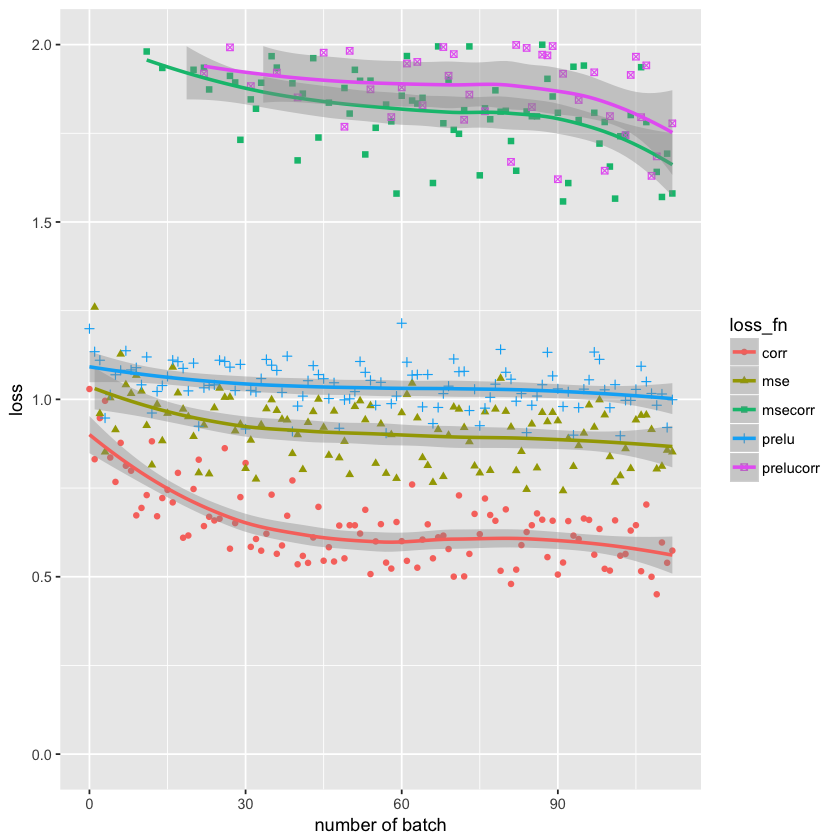

In [46]:
# leaky acitivation function + different loss  functions + basic mlp model
p_loss = ggplot(loss, aes(x = V1, y = V2, shape = loss_fn, colour = loss_fn))
p_loss + geom_point() + xlab("number of batch") +stat_smooth() + ylab("loss") + ylim(0,2)
# ylim(0, max(loss$V2, 2))

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.
`geom_smooth()` using method = 'loess'
Warning message:
“Removed 16 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 16 rows containing missing values (geom_point).”

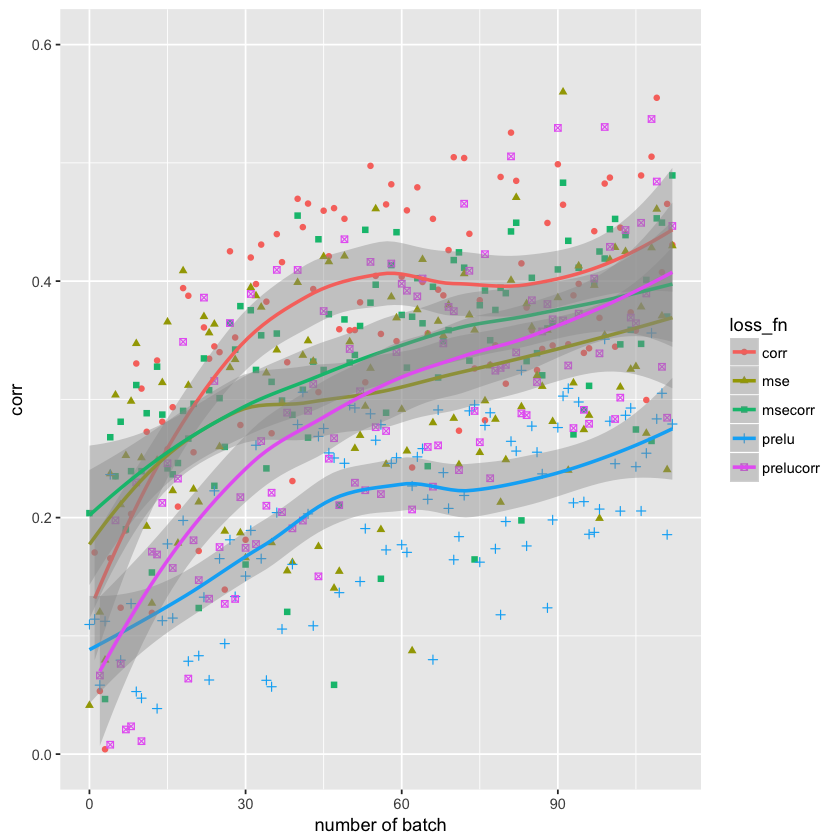

In [47]:
# leaky acitivation function + different loss  functions + basic mlp model
p_corr = ggplot(corr, aes(x = V1, y = V2, shape = loss_fn, colour = loss_fn))
p_corr + geom_point() + xlab("number of batch") + stat_smooth() + ylab("corr") + ylim(0.0, 0.6)

`geom_smooth()` using method = 'loess'
Warning message:
“Removed 11 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 11 rows containing missing values (geom_point).”

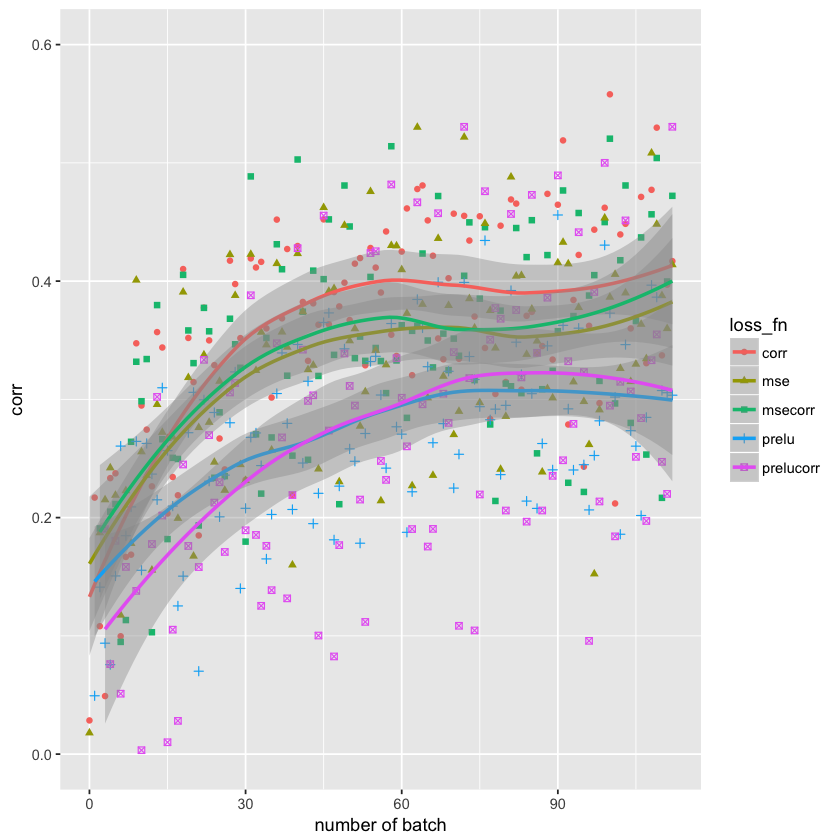

In [73]:
# swish activation + different loss function + basic mlp model
p_corr = ggplot(corr, aes(x = V1, y = V2, shape = loss_fn, colour = loss_fn))
p_corr + geom_point() + xlab("number of batch") + stat_smooth() + ylab("corr") + ylim(0.0, 0.6)

`geom_smooth()` using method = 'loess'
Warning message:
“Removed 46 rows containing non-finite values (stat_smooth).”Warning message:
“The shape palette can deal with a maximum of 6 discrete values because
more than 6 becomes difficult to discriminate; you have 7. Consider
specifying shapes manually if you must have them.”Warning message:
“Removed 144 rows containing missing values (geom_point).”

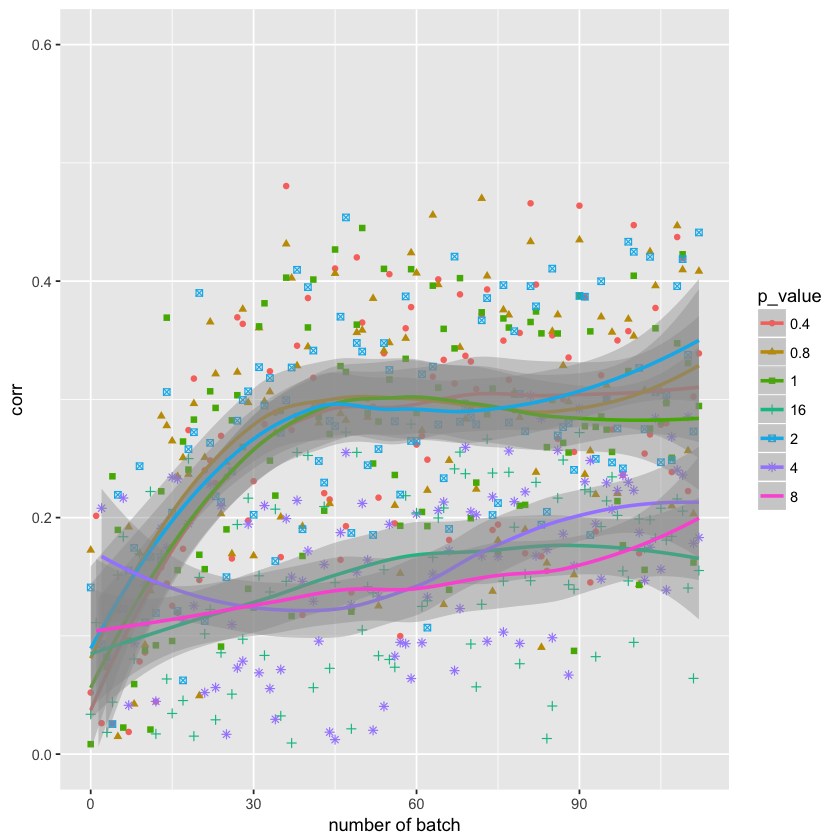

In [76]:
# preluloss with different p values + basic mlp model
p_corr = ggplot(corr, aes(x = V1, y = V2, shape = p_value, colour = p_value))
p_corr + geom_point() + xlab("number of batch")+ stat_smooth() + ylab("corr") + ylim(0.0, 0.6)

`geom_smooth()` using method = 'loess'
Warning message:
“Removed 3 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 3 rows containing missing values (geom_point).”

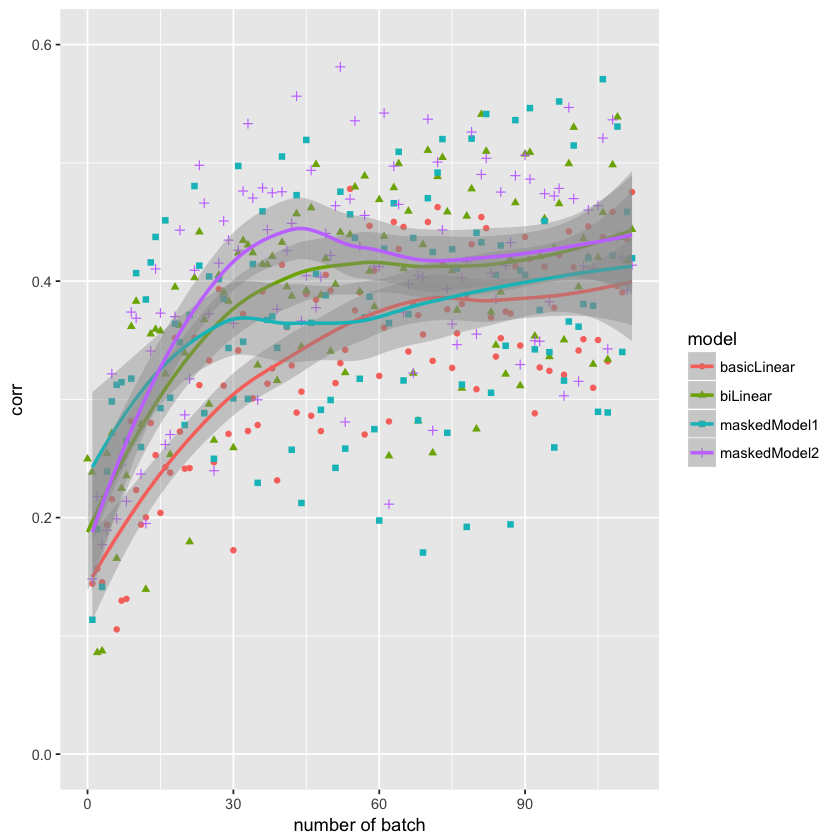

In [87]:
# compare different model, because of the parameters, the result can be wrong.
p_corr = ggplot(corr, aes(x = V1, y = V2, shape = model, colour = model))
p_corr + geom_point() + xlab("number of batch")+ stat_smooth() + ylab("corr") + ylim(0.0, 0.6)

In [91]:
c_loss = read.table('../data/MasterArbeit/mid_result/data_shuffle_acti_prelu_corrloss_loss', header = FALSE, sep = ',')
mc_loss = read.table('../data/MasterArbeit/mid_result/data_shuffle_acti_prelu_msecorrloss_loss', header = FALSE, sep = ',')
m_loss = read.table('../data/MasterArbeit/mid_result/data_shuffle_acti_prelu_mseloss_loss', header = FALSE, sep = ',')
p_loss = read.table('../data/MasterArbeit/mid_result/data_shuffle_acti_prelu_preluloss_loss', header = FALSE, sep = ',')
r_loss = read.table('../data/MasterArbeit/mid_result/data_shuffle_acti_prelu_reluloss_loss', header = FALSE, sep = ',')
c_loss$loss_fn = 'corr'
mc_loss$loss_fn = 'msecorr'
m_loss$loss_fn = 'mse'
p_loss$loss_fn = 'prelu'
r_loss$loss_fn = '?relu'
loss = rbind(c_loss, mc_loss, m_loss, p_loss, r_loss)

In [93]:
c_corr = read.table('../data/MasterArbeit/mid_result/data_shuffle_acti_prelu_corrloss_corr', header = FALSE, sep = ',')
mc_corr = read.table('../data/MasterArbeit/mid_result/data_shuffle_acti_prelu_msecorrloss_corr', header = FALSE, sep = ',')
m_corr = read.table('../data/MasterArbeit/mid_result/data_shuffle_acti_prelu_mseloss_corr', header = FALSE, sep = ',')
p_corr = read.table('../data/MasterArbeit/mid_result/data_shuffle_acti_prelu_preluloss_corr', header = FALSE, sep = ',')
r_corr = read.table('../data/MasterArbeit/mid_result/data_shuffle_acti_prelu_reluloss_corr', header = FALSE, sep = ',')
c_corr$loss_fn = 'corr'
mc_corr$loss_fn = 'msecorr'
m_corr$loss_fn = 'mse'
p_corr$loss_fn = 'prelu'
r_corr$loss_fn = '?relu'
corr = rbind(c_corr, mc_corr, m_corr, p_corr, r_corr)

`geom_smooth()` using method = 'loess'
Warning message:
“Removed 11 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 11 rows containing missing values (geom_point).”

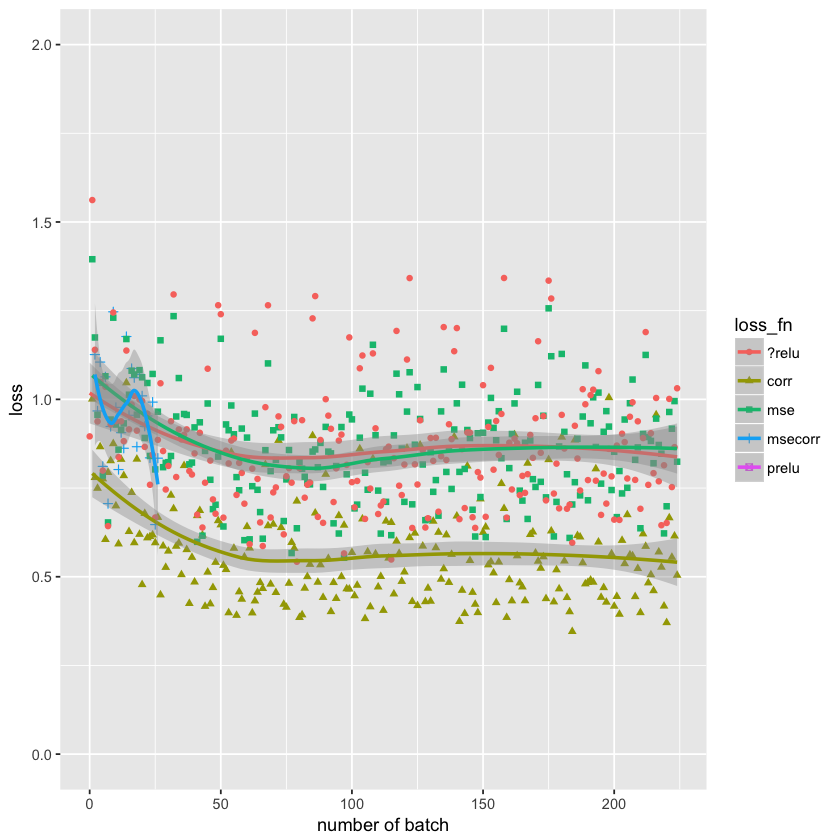

In [95]:
# multihead attention + conv layers + different loss functions
p_loss = ggplot(loss, aes(x = V1, y = V2, shape = loss_fn, colour = loss_fn))
p_loss + geom_point() + xlab("number of batch") +stat_smooth() + ylab("loss") + ylim(0,2)

`geom_smooth()` using method = 'loess'
Warning message:
“Removed 63 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 63 rows containing missing values (geom_point).”

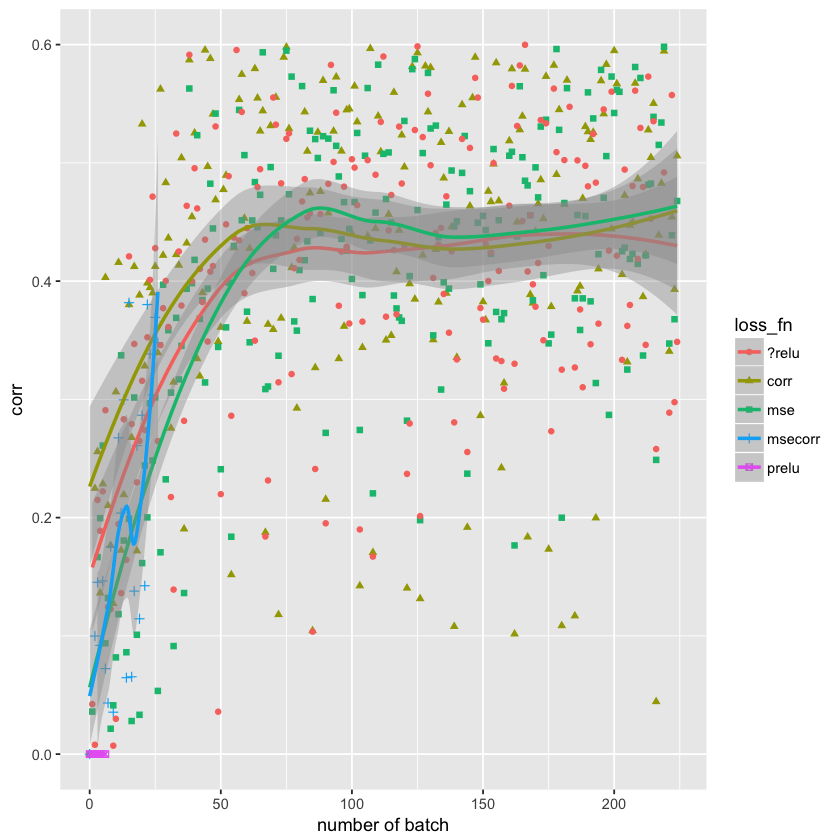

In [97]:
# multihead attention + conv layers + different loss functions
p_corr = ggplot(corr, aes(x = V1, y = V2, shape = loss_fn, colour = loss_fn))
p_corr + geom_point() + xlab("number of batch")+ stat_smooth() + ylab("corr") + ylim(0.0, 0.6)

`geom_smooth()` using method = 'loess'
Warning message:
“Removed 7 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 7 rows containing missing values (geom_point).”

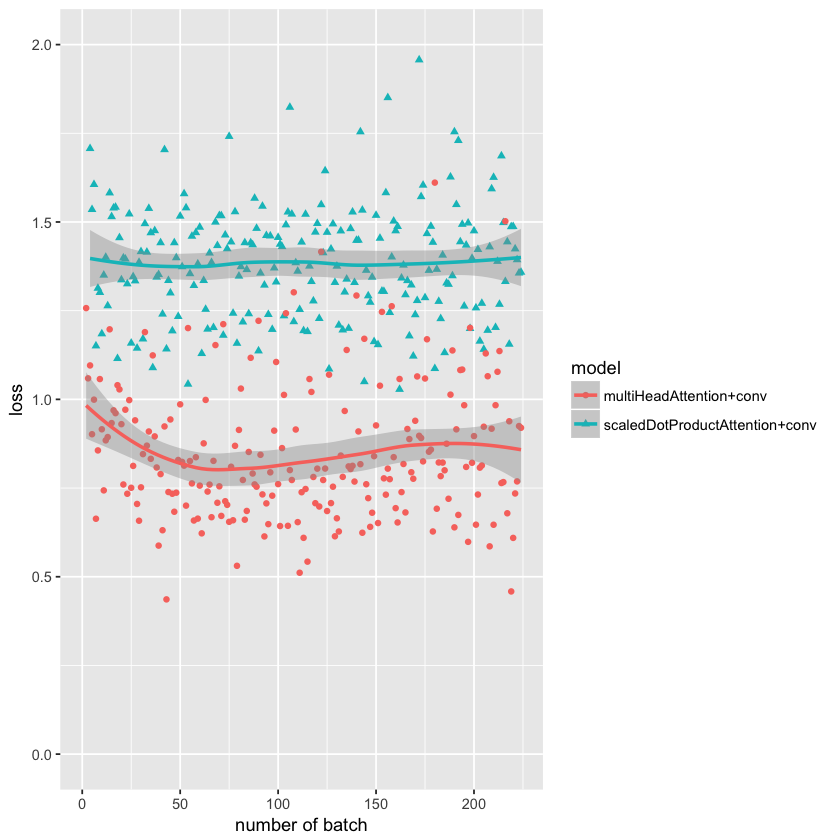

In [102]:
# compare scaledDotProductAttention+conv and multiHeadAttention+conv
p_loss = ggplot(loss, aes(x = V1, y = V2, shape = model, colour = model))
p_loss + geom_point() + xlab("number of batch") +stat_smooth() + ylab("loss") + ylim(0,2)

`geom_smooth()` using method = 'loess'
Warning message:
“Removed 47 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 47 rows containing missing values (geom_point).”

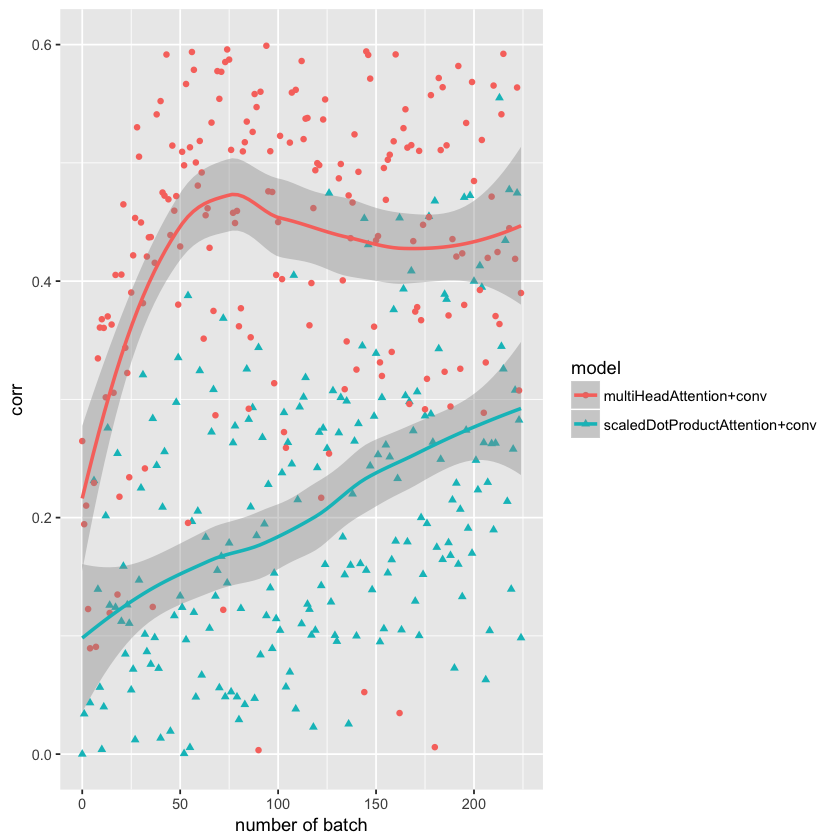

In [104]:
# compare scaledDotProductAttention+conv and multiHeadAttention+convdd
p_corr = ggplot(corr, aes(x = V1, y = V2, shape = model, colour = model))
p_corr + geom_point() + xlab("number of batch")+ stat_smooth() + ylab("corr") + ylim(0.0, 0.6)

## concrete content
introduce each model and the idea behind the model

In [1]:
import fmin
import Params

#### mlp model 
- train the model below with MSELOSS and Adam

In [ ]:
BasicLinear (
  (layers): Sequential (
    (fc1): Linear (1000 -> 100)
    (bn): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True)
    (LeakyReLU1): LeakyReLU (0.01)
    (fc2): Linear (100 -> 10)
    (bn2): BatchNorm1d(10, eps=1e-05, momentum=0.193385289254, affine=True)
    (LeakyReLU2): LeakyReLU (0.01)
    (fc3): Linear (10 -> 1)
  )
)

In [2]:
opt = Params.Params()
pas = {'dim2': 10, 'act_func_out': None, 'tgt': '../data/MasterArbeit/data/data_scores', 'src_sys': '../data/MasterArbeit/test/train_sys_hidden', 'src_ref': '../data/MasterArbeit/test/train_ref_hidden', 'val_tgt': '../data/MasterArbeit/test/val_scores', 'src_val_sys': '../data/MasterArbeit/test/val_sys_hidden', 'src_val_ref': '../data/MasterArbeit/test/val_ref_hidden', 'test_tgt': '../data/MasterArbeit/test/test_scores', 'src_test_sys': '../data/MasterArbeit/test/test_sys_hidden', 'src_test_ref': '../data/MasterArbeit/test/test_ref_hidden', 'optim': 'Adam','loss_fn': 'MSELoss', 'batch_size': 100, 'dim2': 100, 'dim3': 10, 'lr': 0.00592636698766986, 'act_func': 'LeakyReLU', 'act_func_out': None, 'model': './model/LinearModel', 'type': 'linear', 'momentum': 0.19338528925355508, 'drop_out_rate': 0.5683040090088415}
opt.set_params(pas)
fmin.o_func(pas)

('act_func_out', None)
('tgt', '../data/MasterArbeit/data/data_scores')
('loss_fn', 'MSELoss')
('src_test_sys', '../data/MasterArbeit/test/test_sys_hidden')
('dim2', 100)
('dim3', 10)
('val_tgt', '../data/MasterArbeit/test/val_scores')
('test_tgt', '../data/MasterArbeit/test/test_scores')
('weight_decay', 0)
('out', './test_data/pred')
('src_test_ref', '../data/MasterArbeit/test/test_ref_hidden')
('lr', 0.00592636698766986)
('act_func', 'LeakyReLU')
('drop_out_rate', 0.5683040090088415)
('type', 'linear')
('momentum', 0.19338528925355508)
('src_val_ref', '../data/MasterArbeit/test/val_ref_hidden')
('optim', 'Adam')
('batch_size', 100)
('src_val_sys', '../data/MasterArbeit/test/val_sys_hidden')
('src_sys', '../data/MasterArbeit/test/train_sys_hidden')
('src_ref', '../data/MasterArbeit/test/train_ref_hidden')
('eps', 1e-08)
('model', './model/LinearModel')
BasicLinear (
  (layers): Sequential (
    (fc1): Linear (1000 -> 100)
    (bn): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=Tru

0.57757420250889102

- plot the result

The result is bad, the maximal corr is 0.5 with a large var. and the loss value is not reduced.

In [1]:
install.packages('ggplot2')

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [2]:
library(ggplot2)
loss = read.table('../data/MasterArbeit/mid_result/loss', header = FALSE, sep = ',')
corr = read.table('../data/MasterArbeit/mid_result/corr', header = FALSE, sep = ',')

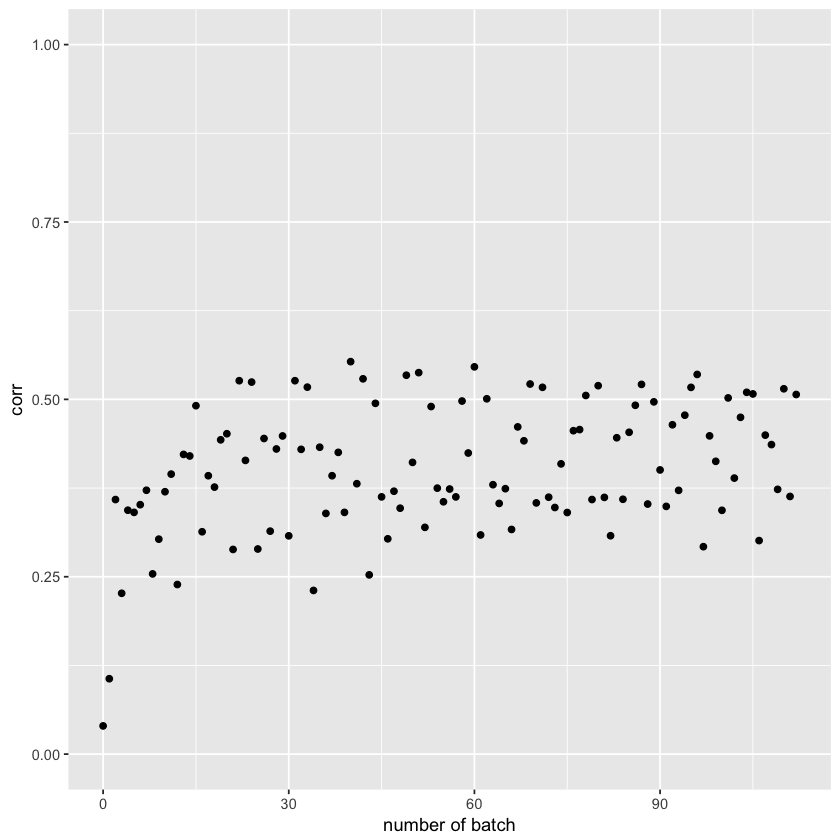

In [3]:
p_corr = ggplot(corr, aes(x = V1, y = V2))
p_corr + geom_point() + xlab("number of batch") + ylab("corr") + ylim(0.0, 1.0)

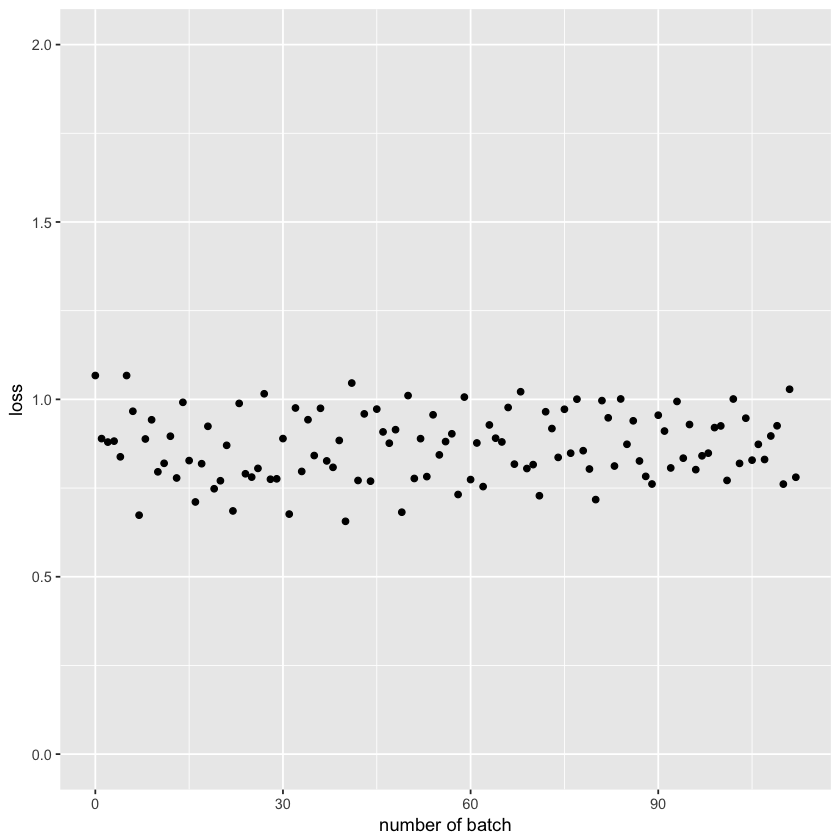

In [4]:
p_loss = ggplot(loss, aes(x = V1, y = V2))
p_loss + geom_point() + xlab("number of batch") + ylab("loss") + ylim(0, max(loss$V2, 2))

In [ ]:
idea: benutze dropout statt BatchNorm, BN braucht extra zwei Parameters für jeden Unit. 
result: worse as BN
model:
BasicLinear_dropout (
  (layers): Sequential (
    (fc1): Linear (1000 -> 100)
    (LeakyReLU1): LeakyReLU (0.01)
    (fc2): Linear (100 -> 10)
    (LeakyReLU2): LeakyReLU (0.01)
    (drop_out): Dropout (p = 0.568304009009)
    (fc3): Linear (10 -> 1)
  )
)

In [2]:
opt = Params.Params()
pas = {'tgt': '../data/MasterArbeit/data/data_scores', 'src_sys': '../data/MasterArbeit/test/train_sys_hidden', 'src_ref': '../data/MasterArbeit/test/train_ref_hidden', 'val_tgt': '../data/MasterArbeit/test/val_scores', 'src_val_sys': '../data/MasterArbeit/test/val_sys_hidden', 'src_val_ref': '../data/MasterArbeit/test/val_ref_hidden', 'test_tgt': '../data/MasterArbeit/test/test_scores', 'src_test_sys': '../data/MasterArbeit/test/test_sys_hidden', 'src_test_ref': '../data/MasterArbeit/test/test_ref_hidden', 'batch_size': 100, 'dim2': 100, 'dim3': 10, 'lr': 0.01592636698766986, 'act_func': 'LeakyReLU', 'act_func_out': None, 'model': 'BasicLinearDropout', 'type': 'linear', 'momentum': 0.19338528925355508, 'drop_out_rate': 0.5683040090088415}
opt.set_params(pas)
fmin.o_func(pas)

('act_func_out', None)
('tgt', '../data/MasterArbeit/data/data_scores')
('loss_fn', 'MSELoss')
('src_test_sys', '../data/MasterArbeit/test/test_sys_hidden')
('dim2', 100)
('dim3', 10)
('val_tgt', '../data/MasterArbeit/test/val_scores')
('test_tgt', '../data/MasterArbeit/test/test_scores')
('weight_decay', 0)
('out', './test_data/pred')
('src_test_ref', '../data/MasterArbeit/test/test_ref_hidden')
('lr', 0.01592636698766986)
('act_func', 'LeakyReLU')
('drop_out_rate', 0.5683040090088415)
('type', 'linear')
('momentum', 0.19338528925355508)
('src_val_ref', '../data/MasterArbeit/test/val_ref_hidden')
('optim', 'Adam')
('batch_size', 100)
('src_val_sys', '../data/MasterArbeit/test/val_sys_hidden')
('src_sys', '../data/MasterArbeit/test/train_sys_hidden')
('src_ref', '../data/MasterArbeit/test/train_ref_hidden')
('eps', 1e-08)
('model', 'BasicLinearDropout')
BasicLinear_dropout (
  (layers): Sequential (
    (fc1): Linear (1000 -> 100)
    (LeakyReLU1): LeakyReLU (0.01)
    (fc2): Linear (1

0.809932582211496

### other models

In [ ]:
idea: Anzahle der Parameters reduzieren
result: worse as the first model
model:
BiLinear (
  (li_sys): Linear (500 -> 500)
  (li_ref): Linear (500 -> 500)
  (act_func): LeakyReLU (0.01)
  (fc): Linear (500 -> 10)
  (drop_out): Dropout (p = 0.5)
  (li_out): Linear (10 -> 1)
)

In [2]:
opt = Params.Params()
pas = {'dim2': 10, 'act_func_out': None, 'tgt': '../data/MasterArbeit/data/data_scores', 'src_sys': '../data/MasterArbeit/test/train_sys_hidden', 'src_ref': '../data/MasterArbeit/test/train_ref_hidden', 'val_tgt': '../data/MasterArbeit/test/val_scores', 'src_val_sys': '../data/MasterArbeit/test/val_sys_hidden', 'src_val_ref': '../data/MasterArbeit/test/val_ref_hidden', 'test_tgt': '../data/MasterArbeit/test/test_scores', 'src_test_sys': '../data/MasterArbeit/test/test_sys_hidden', 'src_test_ref': '../data/MasterArbeit/test/test_ref_hidden', 'batch_size': 100, 'lr': 0.01592636698766986, 'act_func': 'LeakyReLU', 'act_func_out': None , 'model': 'BiLinear'}
opt.set_params(pas)
fmin.o_func(pas)

('act_func_out', None)
('tgt', '../data/MasterArbeit/data/data_scores')
('loss_fn', 'MSELoss')
('src_test_sys', '../data/MasterArbeit/test/test_sys_hidden')
('dim2', 10)
('dim3', None)
('val_tgt', '../data/MasterArbeit/test/val_scores')
('test_tgt', '../data/MasterArbeit/test/test_scores')
('weight_decay', 0)
('out', './test_data/pred')
('src_test_ref', '../data/MasterArbeit/test/test_ref_hidden')
('lr', 0.01592636698766986)
('act_func', 'LeakyReLU')
('drop_out_rate', 0.5)
('momentum', 0.1)
('src_val_ref', '../data/MasterArbeit/test/val_ref_hidden')
('optim', 'Adam')
('batch_size', 100)
('src_val_sys', '../data/MasterArbeit/test/val_sys_hidden')
('src_sys', '../data/MasterArbeit/test/train_sys_hidden')
('src_ref', '../data/MasterArbeit/test/train_ref_hidden')
('eps', 1e-08)
('model', 'BiLinear')
BiLinear (
  (li_sys): Linear (500 -> 500)
  (li_ref): Linear (500 -> 500)
  (act_func): LeakyReLU (0.01)
  (fc): Linear (500 -> 10)
  (drop_out): Dropout (p = 0.5)
  (li_out): Linear (10 -> 1)

0.64278840092910028

In [1]:
library(ggplot2)
loss = read.table('../data/MasterArbeit/mid_result/loss', header = FALSE, sep = ',')
corr = read.table('../data/MasterArbeit/mid_result/corr', header = FALSE, sep = ',')

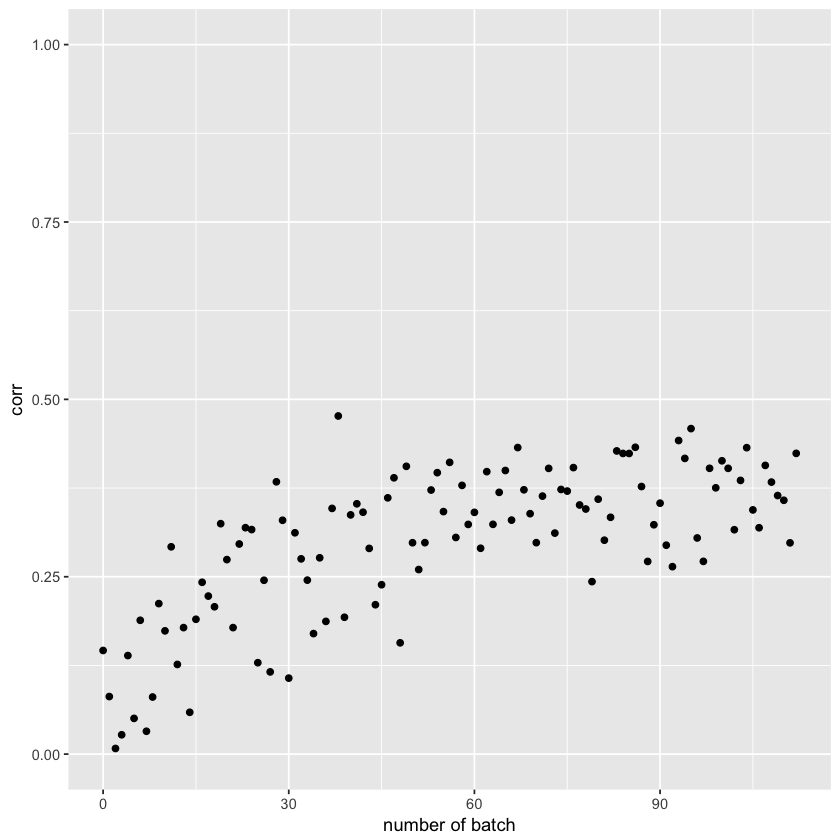

In [2]:
p_corr = ggplot(corr, aes(x = V1, y = V2))
p_corr + geom_point() + xlab("number of batch") + ylab("corr") + ylim(0.0, 1.0)

In [ ]:
idea: nicht alle Demensionen in hidden value vector sind für die evaluation wichtig. 
result: worser as the first one 
model:
MaskedModel1 (
  (li_mask): Linear (500 -> 500)
  (sf): Softmax ()
  (li_1): Linear (500 -> 10)
  (act_func): Tanh ()
  (li_out): Linear (10 -> 1)
)

In [3]:
opt = Params.Params()
pas = {'dim2': 10, 'act_func_out': None, 'tgt': '../data/MasterArbeit/data/data_scores', 'src_sys': '../data/MasterArbeit/test/train_sys_hidden', 'src_ref': '../data/MasterArbeit/test/train_ref_hidden', 'val_tgt': '../data/MasterArbeit/test/val_scores', 'src_val_sys': '../data/MasterArbeit/test/val_sys_hidden', 'src_val_ref': '../data/MasterArbeit/test/val_ref_hidden', 'test_tgt': '../data/MasterArbeit/test/test_scores', 'src_test_sys': '../data/MasterArbeit/test/test_sys_hidden', 'src_test_ref': '../data/MasterArbeit/test/test_ref_hidden', 'batch_size': 100, 'lr': 0.005592636698766986, 'act_func': 'Tanh', 'model': 'MaskedModel1'}
opt.set_params(pas)
fmin.o_func(pas)

('act_func_out', None)
('tgt', '../data/MasterArbeit/data/data_scores')
('loss_fn', 'MSELoss')
('src_test_sys', '../data/MasterArbeit/test/test_sys_hidden')
('dim2', 10)
('dim3', None)
('val_tgt', '../data/MasterArbeit/test/val_scores')
('test_tgt', '../data/MasterArbeit/test/test_scores')
('weight_decay', 0)
('out', './test_data/pred')
('src_test_ref', '../data/MasterArbeit/test/test_ref_hidden')
('lr', 0.005592636698766986)
('act_func', 'Tanh')
('drop_out_rate', 0.5)
('momentum', 0.1)
('src_val_ref', '../data/MasterArbeit/test/val_ref_hidden')
('optim', 'Adam')
('batch_size', 100)
('src_val_sys', '../data/MasterArbeit/test/val_sys_hidden')
('src_sys', '../data/MasterArbeit/test/train_sys_hidden')
('src_ref', '../data/MasterArbeit/test/train_ref_hidden')
('eps', 1e-08)
('model', 'MaskedModel1')
MaskedModel1 (
  (li_mask): Linear (500 -> 500)
  (sf): Softmax ()
  (li_1): Linear (500 -> 10)
  (act_func): Tanh ()
  (li_out): Linear (10 -> 1)
)
number of batch is 75 
number of val batch 9

0.65821116538360724

In [1]:
library(ggplot2)
loss = read.table('../data/MasterArbeit/mid_result/loss', header = FALSE, sep = ',')
corr = read.table('../data/MasterArbeit/mid_result/corr', header = FALSE, sep = ',')

Warning message:
“Removed 2 rows containing missing values (geom_point).”

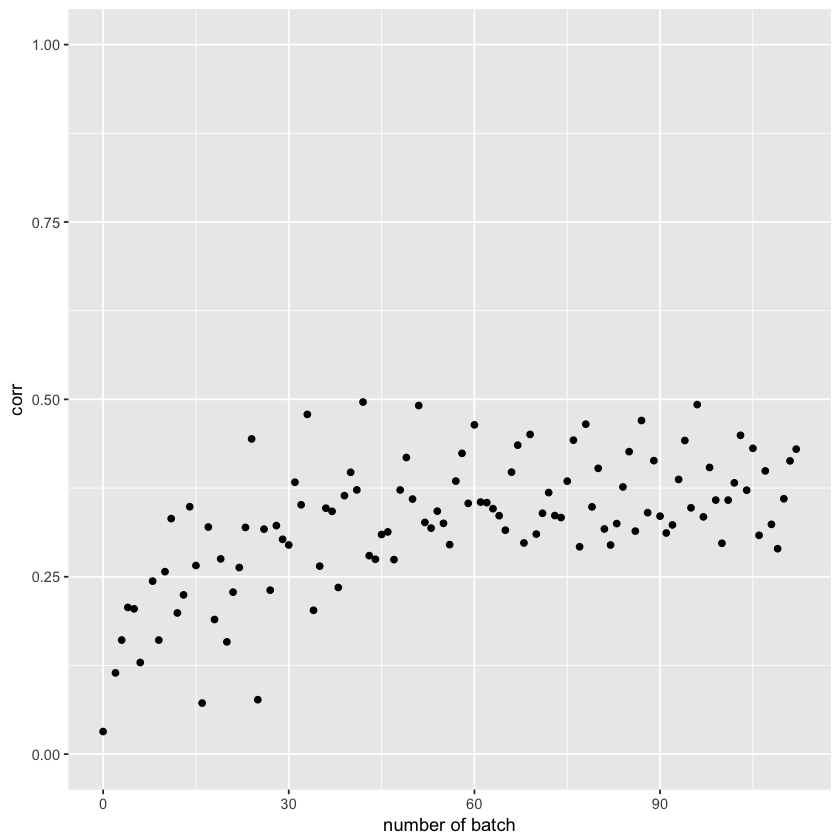

In [2]:
p_corr = ggplot(corr, aes(x = V1, y = V2))
p_corr + geom_point() + xlab("number of batch") + ylab("corr") + ylim(0.0, 1.0)

### random test
the results shown above is bad. I'm not sure if the model has learned something. so i try to use the random data to train the model, and compare the results below

In [2]:
import fmin
import Params

opt = Params.Params()
# Random Test
pas = {
      'tgt': '../data/MasterArbeit/test/train_scores',
      'src_sys': '../data/MasterArbeit/test/train_sys_hidden',
      'src_ref': '../data/MasterArbeit/test/train_ref_hidden',
      'tgt_val': '../data/MasterArbeit/test/val_scores',
      'src_val_sys': '../data/MasterArbeit/test/val_sys_hidden',
      'src_val_ref': '../data/MasterArbeit/test/val_ref_hidden',
      'tgt_test': '../data/MasterArbeit/test/test_scores',
      'src_test_sys': '../data/MasterArbeit/test/test_sys_hidden',
      'src_test_ref': '../data/MasterArbeit/test/test_ref_hidden',
      'optim': 'Adam',
      'loss_fn': 'MSELoss', 
      'batch_size': 100, 
      'dim2': 100, 
      'dim3': 10, 
      'lr': 0.00592636698766986, 
      'act_func': 'LeakyReLU', 
      'act_func_out': None, 
      'model': './model/LinearModel',
      'type': 'linear', 
      'momentum': 0.19338528925355508, 
      'drop_out_rate': 0.5683040090088415,
      'isRandom': True
}
opt.set_params(pas)
fmin.o_func(pas)

('act_func1', 'LeakyReLU')
('act_func_out', None)
('tgt', '../data/MasterArbeit/test/train_scores')
('loss_fn', 'MSELoss')
('isRandom', True)
('src_test_sys', '../data/MasterArbeit/test/test_sys_hidden')
('dim2', 100)
('dim3', 10)
('dim1', 20)
('weight_decay', 0)
('out', './pred')
('kernel_size2', 3)
('kernel_size1', 3)
('src_test_ref', '../data/MasterArbeit/test/test_ref_hidden')
('tgt_test', '../data/MasterArbeit/test/test_scores')
('checkpoint', './checkpoints/cp1')
('num_dim_k', 64)
('tgt_val', '../data/MasterArbeit/test/val_scores')
('lr', 0.00592636698766986)
('act_func', 'LeakyReLU')
('drop_out_rate', 0.5683040090088415)
('type', 'linear')
('momentum', 0.19338528925355508)
('src_val_ref', '../data/MasterArbeit/test/val_ref_hidden')
('resume', False)
('optim', 'Adam')
('batch_size', 100)
('src_val_sys', '../data/MasterArbeit/test/val_sys_hidden')
('num_head', 8)
('num_dim_v', 64)
('stride2', 2)
('src_sys', '../data/MasterArbeit/test/train_sys_hidden')
('act_func2', 'LeakyReLU')
(

1.0610884648737717

In [1]:
library(ggplot2)
loss = read.table('../data/MasterArbeit/mid_result/loss', header = FALSE, sep = ',')
corr = read.table('../data/MasterArbeit/mid_result/corr', header = FALSE, sep = ',')

Warning message:
“Removed 43 rows containing missing values (geom_point).”

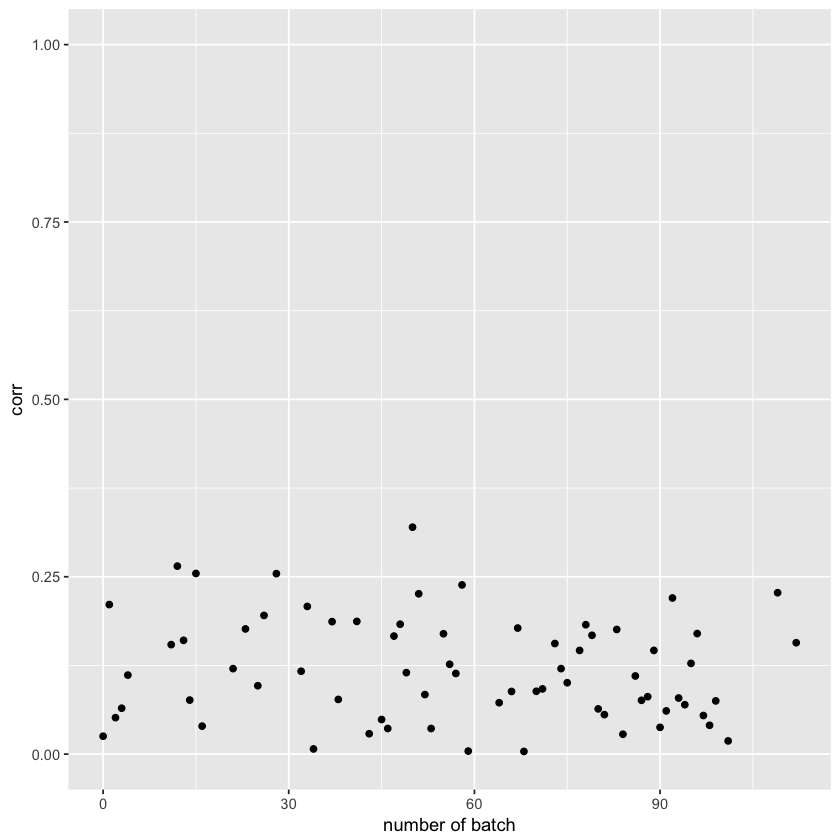

In [2]:
p_corr = ggplot(corr, aes(x = V1, y = V2))
p_corr + geom_point() + xlab("number of batch") + ylab("corr") + ylim(0.0, 1.0)

Warning message:
“Removed 37 rows containing missing values (geom_point).”

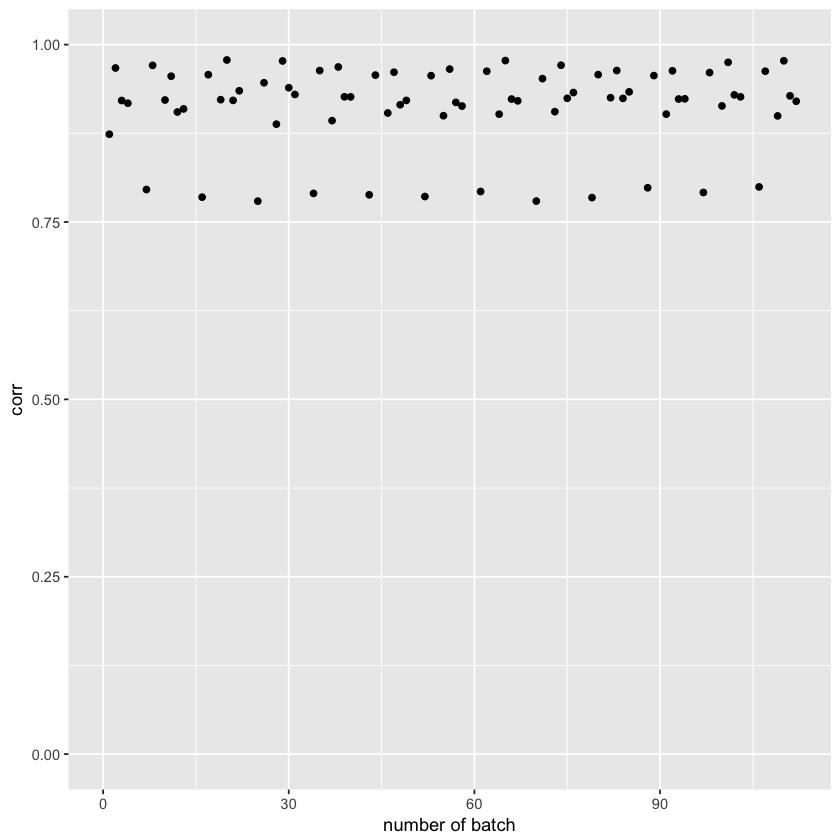

In [3]:
p_corr = ggplot(loss, aes(x = V1, y = V2))
p_corr + geom_point() + xlab("number of batch") + ylab("corr") + ylim(0.0, 1.0)

we can see that the corr of the new model is not train.<br>
a problem is that the loss value stay the same as the other models.

# E2: FullHiddenValue
use the hidden value of all the words in the sentence to do the evaluation.

### ScaledDotProductAttn + Conv model

In [ ]:
ScaledDotAttnConvModel (
  (attn): ScaledDotProductAttention (
    (dropout): Dropout (p = 0.1)
    (softmax): Softmax ()
  )
  (layers): Sequential (
    (conv1): Conv1d(500, 20, kernel_size=(4,), stride=(4,))
    (bn1): BatchNorm1d(20, eps=1e-05, momentum=0.1, affine=True)
    (act_func1): PReLU (1)
    (conv2): Conv1d(20, 1, kernel_size=(8,), stride=(4,))
    (bn2): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=True)
    (act_func2): PReLU (1)
  )
  (li): Linear (5 -> 1)
)

### MultiHeadsAttn + Conv model
idea: some words in the original sentence can effect multi words in the translation sentence. for example plural word.

In [ ]:
MultiHeadAttnConvModel (
  (attn): MultiHeadAttention (
    (attention): ScaledDotProductAttention (
      (dropout): Dropout (p = 0.1)
      (softmax): Softmax ()
    )
    (project): Linear (
      (li): Linear (512 -> 500)
    )
    (dropout): Dropout (p = 0.1)
  )
  (layers): Sequential (
    (conv1): Conv1d(500, 20, kernel_size=(4,), stride=(4,))
    (bn1): BatchNorm1d(20, eps=1e-05, momentum=0.1, affine=True)
    (act_func1): PReLU (1)
    (conv2): Conv1d(20, 1, kernel_size=(8,), stride=(4,))
    (bn2): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=True)
    (act_func2): PReLU (1)
  )
  (li): Linear (5 -> 1)
)

### costum the initialization function 

In [ ]:
acti  = input * self.sigmoid(self.beta * input)

### costum the coss function

##### CorrLoss

use 1 - correlational coefficience between the output of the network and the target as the loss

##### MSECorrLoss

use MSE - p * Corr as the loss, p is the 

##### PReLULoss

use PReLU as the loss function.
    wish that when the output smaller as target, it get more (or less) punishment